In [1]:
%matplotlib inline
import astropy.io.fits as fits
import numpy as np
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style
import subprocess as sp
import scipy.ndimage as sci_nd
import glob
import matplotlib.pyplot as plt
from astropy.table import Table, join, hstack, vstack, Column, MaskedColumn
import sys
import os
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

from astropy.wcs import WCS
import astropy.wcs as pywcs

In [2]:
#using master matched file made via topcat

masterdata = ascii.read('/data1/rowland/mastertable')
masterdata.colnames

# masterfile = fits.open('/data1/rowland/MASTER')
# #len(masterfile[1].data) #89
# masterdata = masterfile[1].data
# masterdata.columns

['ACT-CL',
 'SMH',
 'RAJ2000',
 'DEJ2000',
 'imag',
 'z',
 'e_z',
 'rcc',
 'MSF',
 'Simbad',
 'recno',
 'NUMBER_F105',
 'MAG_AUTO_F105',
 'MAGERR_AUTO_F105',
 'KRON_RADIUS_F105',
 'ISOAREA_IMAGE_F105',
 'XPEAK_IMAGE_F105',
 'YPEAK_IMAGE_F105',
 'X_IMAGE_F105',
 'Y_IMAGE_F105',
 'ALPHA_J2000_F105',
 'DELTA_J2000_F105',
 'A_IMAGE_F105',
 'THETA_IMAGE_F105',
 'MU_MAX_F105',
 'ELLIPTICITY_F105',
 'CLASS_STAR_F105',
 'FLUX_RADIUS_F105',
 'Separation_1',
 'NUMBER_F125',
 'MAG_AUTO_F125',
 'MAGERR_AUTO_F125',
 'KRON_RADIUS_F125',
 'ISOAREA_IMAGE_F125',
 'XPEAK_IMAGE_F125',
 'YPEAK_IMAGE_F125',
 'X_IMAGE_F125',
 'Y_IMAGE_F125',
 'ALPHA_J2000_F125',
 'DELTA_J2000_F125',
 'A_IMAGE_F125',
 'THETA_IMAGE_F125',
 'MU_MAX_F125',
 'ELLIPTICITY_F125',
 'CLASS_STAR_F125',
 'FLUX_RADIUS_F125',
 'Separation_1a',
 'NUMBER_F140',
 'MAG_AUTO_F140',
 'MAGERR_AUTO_F140',
 'KRON_RADIUS_F140',
 'ISOAREA_IMAGE_F140',
 'XPEAK_IMAGE_F140',
 'YPEAK_IMAGE_F140',
 'X_IMAGE_F140',
 'Y_IMAGE_F140',
 'ALPHA_J2000_F140',


# elgordo_F105W

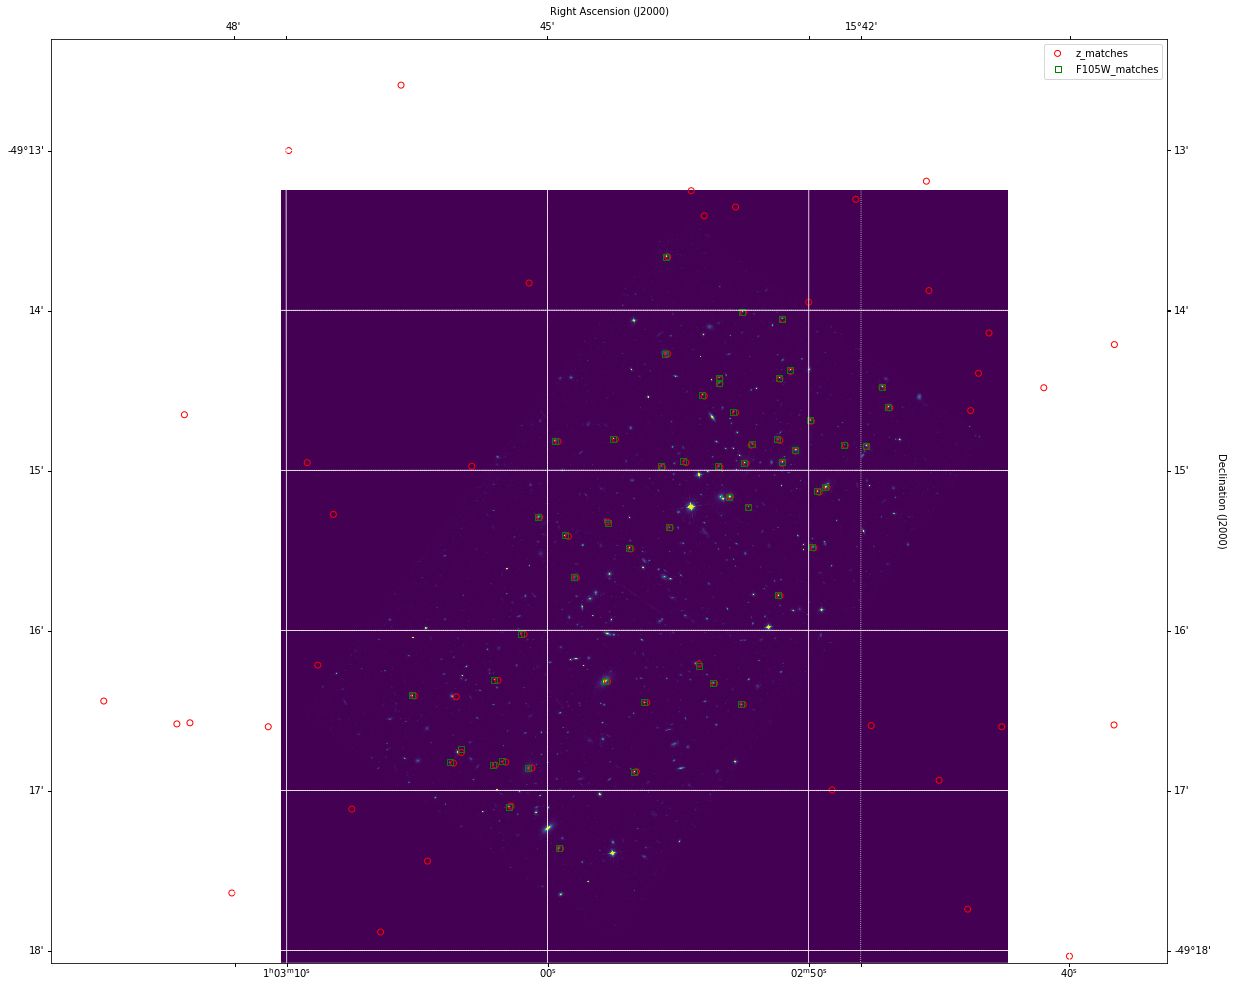

In [3]:
#overlay plot -- squares are F105 ra/dec; circles are z_tables ra/dec


%matplotlib inline

filename = get_pkg_data_filename('/data1/rowland/elgordo_F105W.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(projection=wcs)

ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
r = plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='red', facecolor='none',transform=ax.get_transform('fk5'),label='z_matches')
s = plt.scatter(masterdata['ALPHA_J2000_F105'], masterdata['DELTA_J2000_F105'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'),label='F105W_matches')
ax.grid(color='white', ls='solid')
ax.legend()

# elgordo_F125W

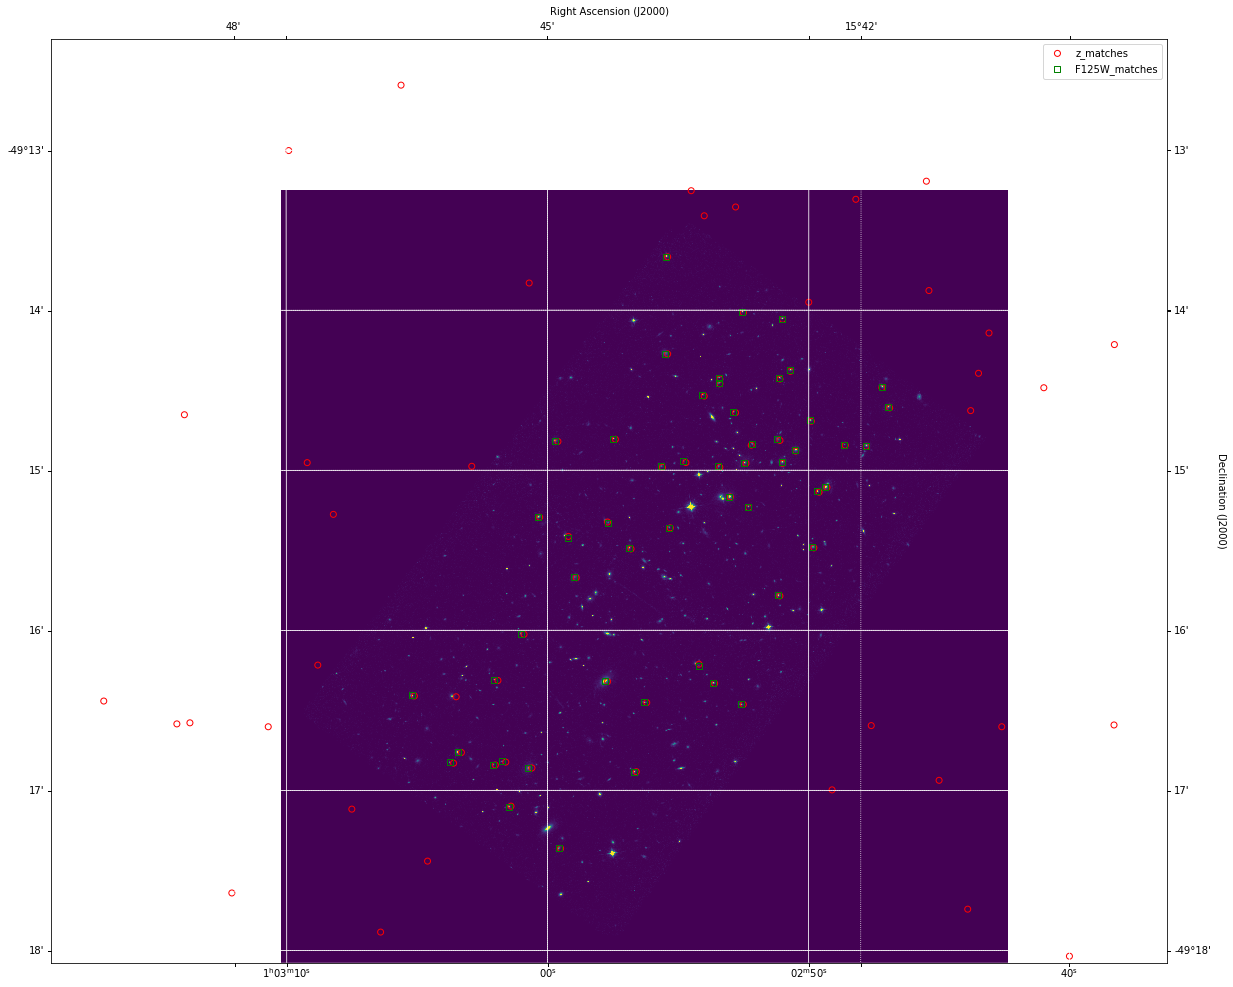

In [4]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(projection=wcs)
filename = get_pkg_data_filename('/data1/rowland/elgordo_F125W.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)


ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
r = plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='r', facecolor='none',transform=ax.get_transform('fk5'),label='z_matches')
s = plt.scatter(masterdata['ALPHA_J2000_F125'], masterdata['DELTA_J2000_F125'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'),label='F125W_matches')
ax.grid(color='white', ls='solid')
ax.legend()

# elgordo_F140W

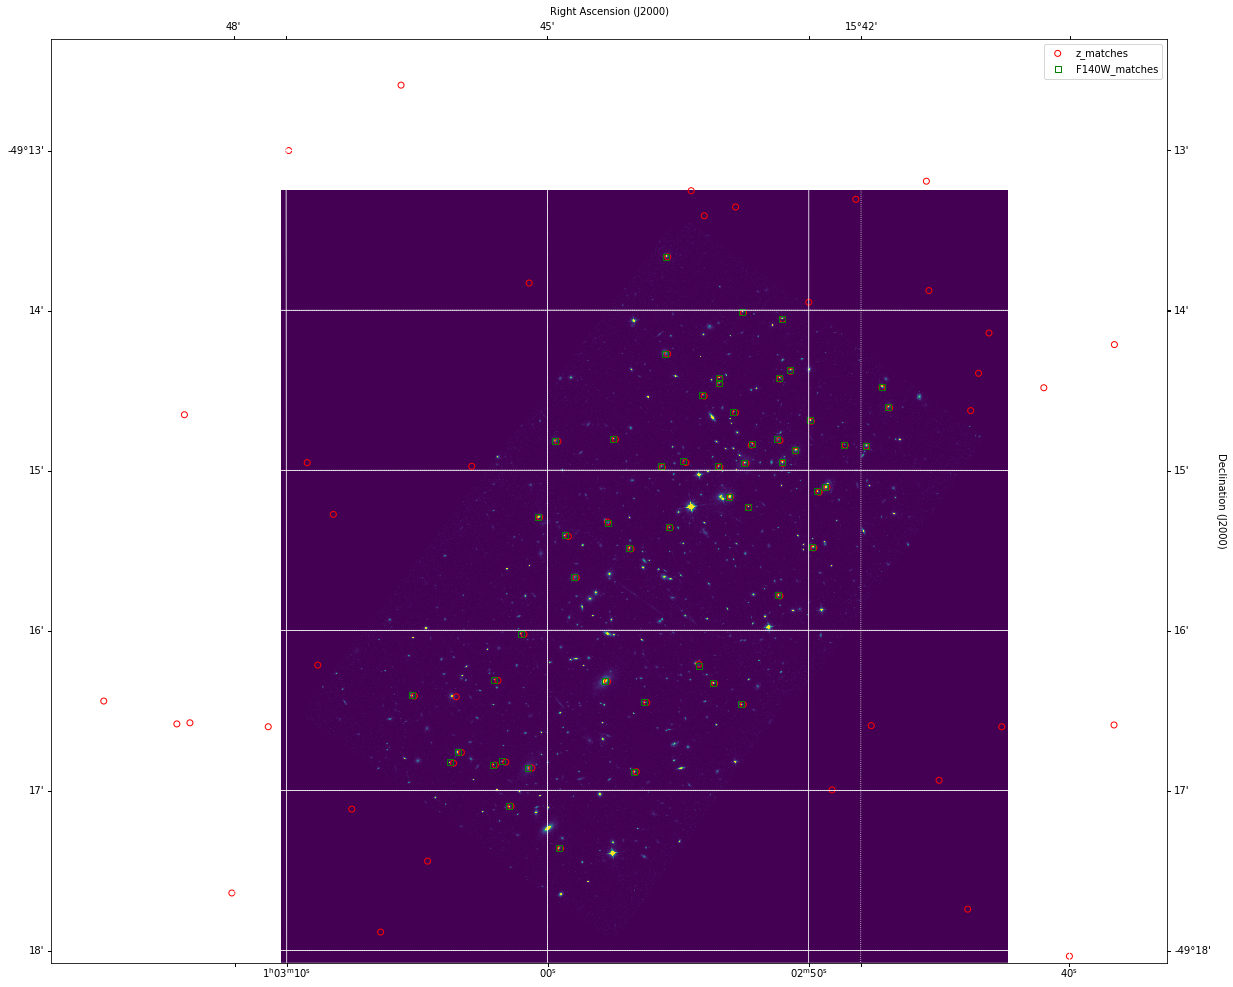

In [5]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(projection=wcs)
filename = get_pkg_data_filename('/data1/rowland/elgordo_F140W.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)


ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
r = plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='r', facecolor='none',transform=ax.get_transform('fk5'),label='z_matches')
s = plt.scatter(masterdata['ALPHA_J2000_F140'], masterdata['DELTA_J2000_F140'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'),label='F140W_matches')
ax.grid(color='white', ls='solid')
ax.legend()

# elgordo_F160W

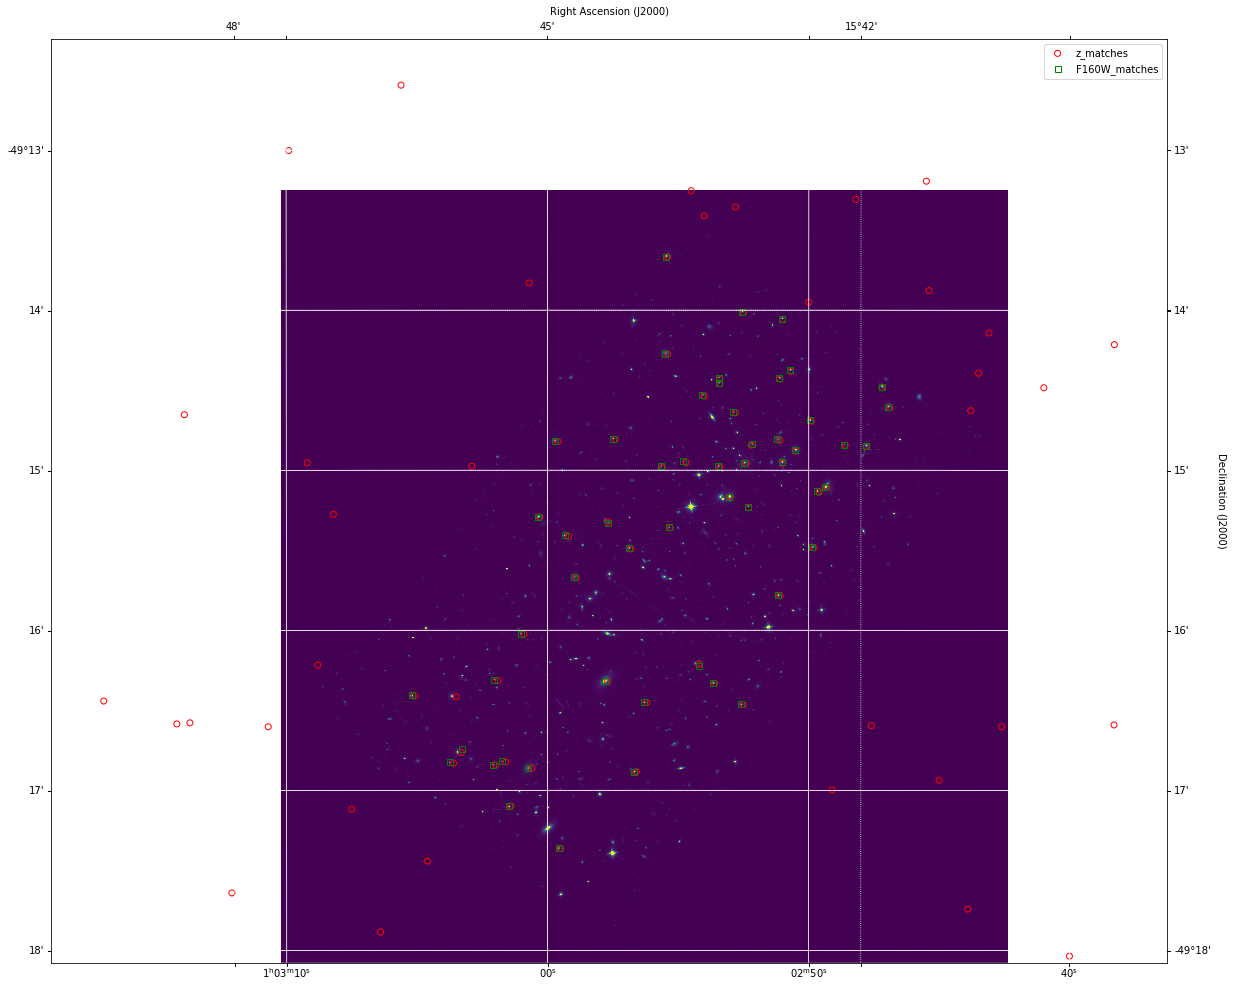

In [6]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(projection=wcs)
filename = get_pkg_data_filename('/data1/rowland/elgordo_F160W.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)


ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
r = plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='r', facecolor='none',transform=ax.get_transform('fk5'),label='z_matches')
s = plt.scatter(masterdata['ALPHA_J2000_F160'], masterdata['DELTA_J2000_F160'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'),label='F160W_matches')
ax.grid(color='white', ls='solid')
ax.legend()

# elgordo_F435W

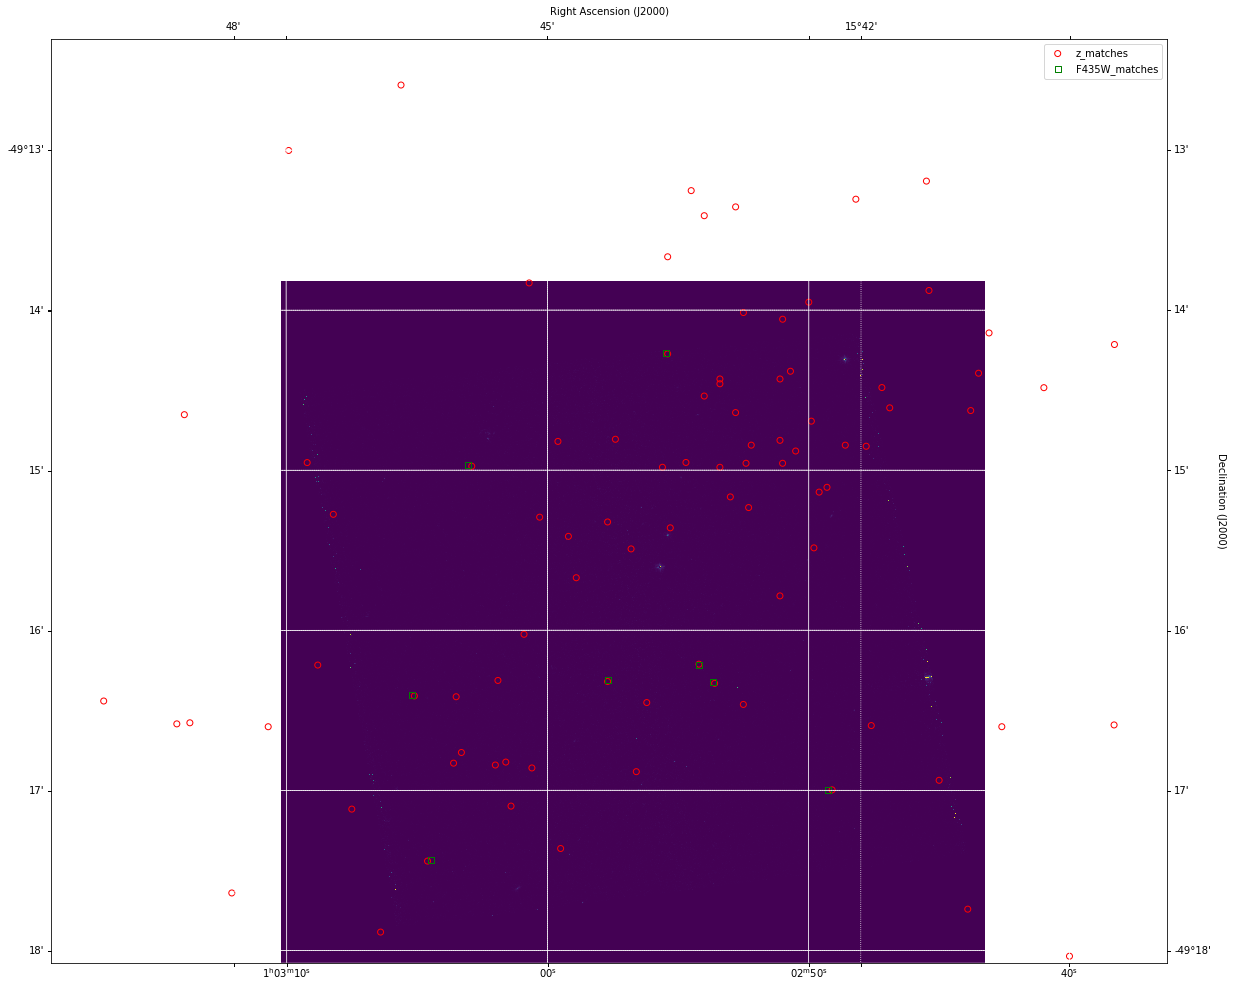

In [7]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(projection=wcs)
filename = get_pkg_data_filename('/data1/rowland/elgordo_F435W.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)


ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
r = plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='r', facecolor='none',transform=ax.get_transform('fk5'),label='z_matches')
s = plt.scatter(masterdata['ALPHA_J2000_F435'], masterdata['DELTA_J2000_F435'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'),label='F435W_matches')

# ramin, ramax = np.nanmin(masterdata['ALPHA_J2000_1b'],np.nanmax(masterdata['ALPHA_J2000_1b'])) #in deg
# decmin, decmax = np.nanmin(masterdata['DELTA_J2000_1b'],np.nanmax(masterdata['DELTA_J2000_1b'])) #in deg
# position_in_deg = SkyCoord(ra, dec,frame='fk5')
#ax.set_xlim()


ax.grid(color='white', ls='solid')
ax.legend()

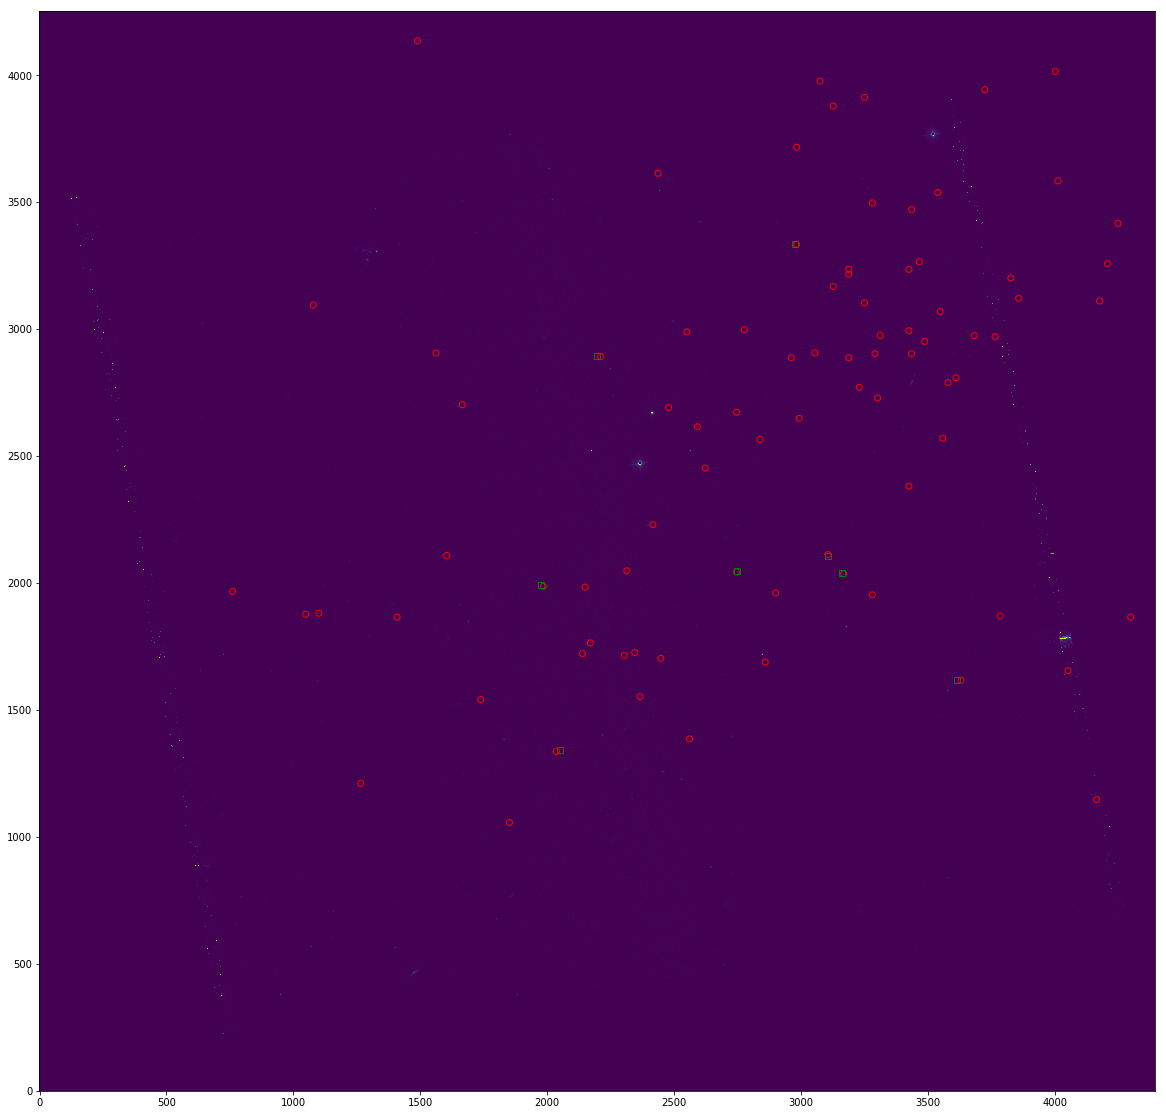

In [8]:
fig = plt.figure(figsize=(20,20))
#ax = plt.subplot(projection=wcs)
filename = get_pkg_data_filename('/data1/rowland/elgordo_F435W.fits')

hdu = fits.open(filename)[0]

#wcs = WCS(hdu.header)


plt.imshow(hdu.data, vmin=0, vmax=1, origin='lower')
#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
#overlay[0].set_axislabel('Right Ascension (J2000)')
#overlay[1].set_axislabel('Declination (J2000)')
plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='r', facecolor='none',transform=ax.get_transform('fk5'),label='z_matches')
plt.scatter(masterdata['ALPHA_J2000_F435'], masterdata['DELTA_J2000_F435'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'),label='F435W_matches')

# ramin, ramax = np.nanmin(masterdata['ALPHA_J2000_1b'],np.nanmax(masterdata['ALPHA_J2000_1b'])) #in deg
# decmin, decmax = np.nanmin(masterdata['DELTA_J2000_1b'],np.nanmax(masterdata['DELTA_J2000_1b'])) #in deg
# position_in_deg = SkyCoord(ra, dec,frame='fk5')
#ax.set_xlim()


#ax.grid(color='white', ls='solid')
#ax.legend()

In [12]:
# ramin = np.nanmin(masterdata['ALPHA_J2000_1b'])#*u.deg
# ramax = (np.nanmax(masterdata['ALPHA_J2000_1b']))#*u.deg #in deg
# decmin = np.nanmin(masterdata['DELTA_J2000_1b']) *u.deg
# decmax = (np.nanmax(masterdata['DELTA_J2000_1b'])) * u.deg#in deg
#position_in_hms = SkyCoord(ramin, decmin,frame='fk4')
#position_in_hms = SkyCoord(1*u.)
#print(ramin,ramax,decmin, decmax,'POSITIONS:', position_in_hms.transform_to())

In [13]:
#SkyCoord??

In [14]:
# #converts degrees to dms
# def decdeg2dms(dd):
#     is_positive = dd >= 0
#     dd = abs(dd)
#     minutes,seconds = divmod(dd*3600,60)
#     degrees,minutes = divmod(minutes,60)
#     degrees = degrees if is_positive else -degrees
#     return (degrees,minutes,seconds)

In [15]:
#decdeg2dms(ramin), ramin



### zoom function attempts

In [16]:
# def zoom_elgordo(ra,dec):
#     #fig, (ax0,ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(5,2)
#     position_in_deg = SkyCoord(ra, dec,frame='icrs')
# #     fn = 'elgordo_F*.fits'
# #     for file in fn:
# #         image = pyfits.open('/data1/rowland/{}'.format(file))
# #         header = image.header
# #         print(header)

#     return position_in_deg

In [17]:
#zoom_elgordo('1h02m29.96s', '-49d16m18.7s')

In [18]:
# from astropy.coordinates import SkyCoord
# from astropy.wcs import WCS
# from astropy.nddata import Cutout2D

# position = SkyCoord('1h02m29.96s -49d16m18.7s', frame='icrs') #converts hms to deg
# wcs = WCS(naxis=2)
# rho = np.pi / 3.
# scale = 0.05 / 3600.
# wcs.wcs.cd = [[scale*np.cos(rho), -scale*np.sin(rho)],
#               [scale*np.sin(rho), scale*np.cos(rho)]]
# wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']
# wcs.wcs.crval = [position.ra.to_value(u.deg),
#                  position.dec.to_value(u.deg)]
# wcs.wcs.crpix = [50, 100]

In [19]:
# cutout = Cutout2D(hdu, position, (2, 2), wcs=wcs)
# plt.imshow(cutout.data, origin='lower')  

In [20]:
#print(position)

In [21]:
# #general to zoom on elgordo files only, no hms coords, in degrees to pixels

# def zoom_elgordo(X,Y):
#     #fig, (ax0,ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(5,2)
#     fn = '/data1/rowland/elgordo_F*.fits'
#     ra, dec = wcs.pixel_to_world(X,Y)
#     #for file in fn:
#     image = pyfits.open(fn)
#         #x0,x1,y0,y1=0,image.data.shape[1],0,image.data.shape[0]
#         #print(x0,x1,y0,y1)
#     print(image,'radec:',ra,dec)
    

In [22]:
#zoom_elgordo(2022.579,1761.2362 )

In [23]:
# header = hdu.header
# ra = 15.787686570524846
# dec = -49.29496633697127
# #wcs=pywcs.WCS(header)

# xpix, ypix = wcs.wcs_world2pix(ra,dec)
# xpix, ypix

In [24]:
# masterdata['X_IMAGE_1'][0], masterdata['Y_IMAGE_1'][0],masterdata['ALPHA_J2000_1'][0],masterdata['DELTA_J2000_1'][0]

(2022.579, 1761.2362, 15.7408857, -49.2719458)

In [25]:
# def get_image_coordinates(self):

#         header = self.header
#         #print('header:',header)
#         x0,x1,y0,y1=0,self.data.shape[1],0,self.data.shape[0]
#         print('x:',x0,x1,'y:',y0,y1)
#         wcs=pywcs.WCS(header)
#         print('wcs:',wcs)
#         pixCoords=wcs.wcs_pix2world([[x0,y0],[x1,y1]],1)
#         print('pixcoords:',pixCoords)
#         pixLow = pixCoords[0]
#         pixHig = pixCoords[1]
#         return (pixLow[0],pixHig[0],pixLow[1],pixHig[1])


In [26]:
#hdu.data.shape #x=(0,4397) y =(0,4256)

In [27]:
#hdu.data.shape[1]

In [28]:
# degcoords = get_image_coordinates(hdu)
# degcoords #degrees

In [29]:
#np.min(hdu.data) #pixels

In [30]:
# from astropy.coordinates import FK5
# from astropy.time import Time
# test = SkyCoord(ra=degcoords[0], dec=degcoords[2], unit='deg', frame=FK5(equinox=Time('J2000')))  #'fk5')
# test.get_transform(frame='icrs')

In [31]:
# #to easily cycle thru all filters....PART ONE (of3)

# def usingfilter(filtername):
#     #filter = filtername
#     detected_objs_file_table = ascii.read('/data1/rowland/testPSF_{}.cat'.format(filtername))
#     image_file = pyfits.open('/data1/rowland/elgordo_{}.fits'.format(filtername))
#     segmap_file = pyfits.open('/data1/rowland/segmaps_check/{}_check.fits'.format(filtername))
#     data_perfilter = detected_objs_file_table, image_file, segmap_file, filtername
#     return(data_perfilter)



# filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP","F105W_galfit_test_folder"]
# zeropoints = {"F435W":25.665,"F606W":26.493,"F814W":25.97,"F105W":26.2687,"F125W":26.2303,"F140W":24.4524,\
#               "F160W":25.9463, "F625W":24.85714771, "F775W":25.66195995, "F850LP":25.89943399}


In [32]:
# #using master matched file made via topcat


# masterfile = pyfits.open('/data1/rowland/MASTER')
# #type(masterfile) #astropy.fits.hduLIST
# #masterfile.info()
# #masterdata = masterfile[0]
# #masterfile[0]#image??
# #masterfile[1].header # weird
# len(masterfile[1].data) #89
# masterdata = masterfile[1].data

In [33]:
# ra_zmaster = masterdata['RAJ2000']
# dec_zmaster = masterdata['DEJ2000']


In [34]:
#to easily cycle thru all filters....PART TWO (of3)

#CHANGE FILTER HERE
############################################################################
# data105 = usingfilter(filters[0])
# data125 = usingfilter(filters[1])
# data140 = usingfilter(filters[2])
# data160 = usingfilter(filters[3])
# data435 = usingfilter(filters[4])
# data606 = usingfilter(filters[5])
# data625 = usingfilter(filters[6])
# data775 = usingfilter(filters[7])
# data814 = usingfilter(filters[8])
# data850 = usingfilter(filters[9])


############################################################################

#this is harder, just do brunt force above
# numbermatches = []
# for count, filter in enumerate(filters):
#     data = usingfilter(filter)
# #    colnames = data[0].columns
# #     for i in colnames:
# #         ra = data[0][i]
# #         dec = data[0][i]
# #         print(ra,dec,'next')
#     number = data[0]['NUMBER']
#     ra = data[0]['ALPHA_J2000']
#     dec = data[0]['DELTA_J2000']
#     mag_auto = data[0]['MAG_AUTO']
#     mag_auto_err = data[0]['MAGERR_AUTO']
#     class_star = data[0]['CLASS_STAR']
#     xpeak_image = data[0]['XPEAK_IMAGE']
#     ypeak_image = data[0]['YPEAK_IMAGE']
    
#     #print(type(ra)) #table col
#     #print(ra) #all per filter
#     #do i want below? this is gonna be a HUGE table if have to carry vals per filter
# #     x_image = data[0]['X_IMAGE']
# #     y_image = data[0]['Y_IMAGE']
# #     kron_radius = data[0]['KRON_RADIUS']
# #     isoarea_image = data[0]['ISOAREA_IMAGE']
# #     a_image = data[0]['A_IMAGE']
# #     theta_image = data[0]['THETA_IMAGE']
# #     mu_max = data[0]['MU_MAX']
# #     ellip = data[0]['ELLIPTICITY']
# #     flux_radius = data[0]['FLUX_RADIUS']
#     break    

In [35]:
# #to easily cycle thru all filters....PART THREE (of3)

# filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP","F105W_galfit_test_folder"]

# #defing data for F105W
# detected_objs_file105 = data105[0]
# image_file105 = data105[1][0]
# filtername105 = data105[3]

# #defing data for F125W
# detected_objs_file125 = data125[0]
# image_file125 = data125[1]
# filtername125 = data125[3]

# #defing data for F140W
# detected_objs_file140 = data140[0]
# image_file140 = data140[1]
# filtername140 = data140[3]

# #defing data for F160W
# detected_objs_file160 = data160[0]
# image_file160 = data160[1]
# filtername160 = data160[3]

# #defing data for F435W
# detected_objs_file435 = data435[0]
# image_file435 = data435[1]
# filtername435 = data435[3]

# #defing data for F606W
# detected_objs_file606 = data606[0]
# image_file606 = data606[1]
# filtername606 = data606[3]

# #defing data for F625W
# detected_objs_file625 = data625[0]
# image_file625 = data625[1]
# filtername625 = data625[3]

# #defing data for F775W
# detected_objs_file775 = data775[0]
# image_file775 = data775[1]
# filtername775 = data775[3]

# #defing data for F814W
# detected_objs_file814 = data814[0]
# image_file814 = data814[1]
# filtername814 = data814[3]

# #defing data for F850W
# detected_objs_file850 = data850[0]
# image_file850 = data850[1]
# filtername850 = data850[3]

In [36]:
#image_file105.header

In [37]:
#first practice - worked


# import matplotlib.pyplot as plt

# from astropy.wcs import WCS
# from astropy.io import fits
# from astropy.utils.data import get_pkg_data_filename

# filename = get_pkg_data_filename('/data1/rowland/elgordo_F105W.fits')

# hdu = fits.open(filename)[0]
# wcs = WCS(hdu.header)


# plt.figure(figsize=(10,10))
# plt.subplot(projection=wcs)
# plt.imshow(hdu.data, vmin=0, vmax=1, origin='lower')

# plt.grid(color='white', ls='solid')
# plt.xlabel('Galactic Longitude')
# plt.ylabel('Galactic Latitude')

In [38]:
#bad practice 

# wcs = WCS(image_file105.header)

# print(wcs)

# plt.subplot(projection=wcs)
# plt.imshow(masterfile.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
# plt.grid(color='white', ls='solid')

In [39]:
#type(detected_objs_file105)

#already wrote below so wont rewrite
#detected_objs_file105.write('/data1/rowland/FITSFILEf105.fits',format='fits')
#detected_objs_file125.write('/data1/rowland/FITSFILEf125.fits',format='fits')
#detected_objs_file140.write('/data1/rowland/FITSFILEf140.fits',format='fits')
#detected_objs_file160.write('/data1/rowland/FITSFILEf160.fits',format='fits')
# detected_objs_file435.write('/data1/rowland/FITSFILEf435.fits',format='fits')
# detected_objs_file606.write('/data1/rowland/FITSFILEf606.fits',format='fits')
# detected_objs_file625.write('/data1/rowland/FITSFILEf625.fits',format='fits')
# detected_objs_file775.write('/data1/rowland/FITSFILEf775.fits',format='fits')
# detected_objs_file814.write('/data1/rowland/FITSFILEf814.fits',format='fits')
# detected_objs_file850.write('/data1/rowland/FITSFILEf850.fits',format='fits')


In [40]:
# ra105 = detected_objs_file105['ALPHA_J2000']
# dec105 = detected_objs_file105['DELTA_J2000']

# ra125 = detected_objs_file125['ALPHA_J2000']
# dec125 = detected_objs_file125['DELTA_J2000']

# ra140 = detected_objs_file140['ALPHA_J2000']
# dec140 = detected_objs_file140['DELTA_J2000']

# ra160 = detected_objs_file160['ALPHA_J2000']
# dec160 = detected_objs_file160['DELTA_J2000']

# ra435 = detected_objs_file435['ALPHA_J2000']
# dec435 = detected_objs_file435['DELTA_J2000']

# ra606 = detected_objs_file606['ALPHA_J2000']
# dec606 = detected_objs_file606['DELTA_J2000']

# ra625 = detected_objs_file625['ALPHA_J2000']
# dec625 = detected_objs_file625['DELTA_J2000']

# ra775 = detected_objs_file775['ALPHA_J2000']
# dec775 = detected_objs_file775['DELTA_J2000']

# ra814 = detected_objs_file814['ALPHA_J2000']
# dec814 = detected_objs_file814['DELTA_J2000']

# #coords850 = (detected_objs_file850['ALPHA_J2000'],detected_objs_file850['DELTA_J2000'])
# ra850 = detected_objs_file850['ALPHA_J2000']
# dec850 = detected_objs_file850['DELTA_J2000']

# DO CATALOG MATCHING WITH EACH FILTER TO FIX MAX # OF MATCHES, 
#THEN MATCH OTHER FILTERS TO THAT FILTERS RA & dECS BEFORE ADDING IN Z



In [41]:
# #practice works -- circles are z_tables ra/dec

# fig = plt.figure(figsize=(10,10))
# ax = plt.subplot(projection=wcs)
# filename = get_pkg_data_filename('/data1/rowland/elgordo_F105W.fits')

# hdu = fits.open(filename)[0]
# wcs = WCS(hdu.header)


# ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')

# overlay = ax.get_coords_overlay('fk5')
# overlay.grid(color='white', ls='dotted')
# overlay[0].set_axislabel('Right Ascension (J2000)')
# overlay[1].set_axislabel('Declination (J2000)')
# r = plt.scatter(ra_zmaster, dec_zmaster, edgecolor='cyan', facecolor='none',
#              transform=ax.get_transform('fk5'))
# #ax.add_patch(r)
# ax.grid(color='white', ls='solid')
# #ax.set_xlabel('Galactic Longitude')
# #ax.set_ylabel('Galactic Latitude')

In [42]:
#np.nanmin(masterdata['ALPHA_J2000_1'])#,np.max(masterdata['ALPHA_J2000_1'])

In [43]:
#ax.transLimits.transform((np.nanmin(masterdata['ALPHA_J2000_1']),np.nanmax(masterdata['ALPHA_J2000_1'])))

In [44]:
#practice works -- squares are F105 ra/dec; circles are z_tables ra/dec


# %matplotlib inline

# fig = plt.figure(figsize=(20,20))
# ax = plt.subplot(projection=wcs)
# filename = get_pkg_data_filename('/data1/rowland/elgordo_F105W.fits')

# hdu = fits.open(filename)[0]
# wcs = WCS(hdu.header)


# ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')

# overlay = ax.get_coords_overlay('fk5')
# overlay.grid(color='white', ls='dotted')
# overlay[0].set_axislabel('Right Ascension (J2000)')
# overlay[1].set_axislabel('Declination (J2000)')
# r = plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='cyan', facecolor='none',transform=ax.get_transform('fk5'))
# s = plt.scatter(masterdata['ALPHA_J2000_1'], masterdata['DELTA_J2000_1'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'))
# ax.grid(color='white', ls='solid')

#ax.add_patch(r)

#NONE works :(
# x=ax.scatter(np.nanmin(masterdata['ALPHA_J2000_1']),np.nanmin(masterdata['DELTA_J2000_1']),marker='.',color='r',transform=ax.get_transform('fk5'))
# y=ax.scatter(np.nanmax(masterdata['ALPHA_J2000_1']),np.nanmax(masterdata['DELTA_J2000_1']),marker='.',color='y',transform=ax.get_transform('fk5'))
# print(x.value,y)
# x = ax.transLimits.transform((np.nanmin(masterdata['ALPHA_J2000_1']),np.nanmax(masterdata['ALPHA_J2000_1'])))
# y = ax.transLimits.transform((np.nanmin(masterdata['DELTA_J2000_1']),np.nanmax(masterdata['DELTA_J2000_1'])))
# ax.set_xlim(x)
# ax.set_ylim(y)
#ax.set_xlim(np.nanmin(masterdata['ALPHA_J2000_1']),np.nanmax(masterdata['ALPHA_J2000_1']),transform=ax.get_transform('fk5'))
#ax.set_ylim(np.nanmin(masterdata['DELTA_J2000_1']),np.nanmax(masterdata['DELTA_J2000_1']), transform=ax.get_transform('fk5'))
# ax.set_xlim(np.nanmin(masterdata['ALPHA_J2000_1']),np.nanmax(masterdata['ALPHA_J2000_1']))
# ax.set_ylim(np.nanmin(masterdata['DELTA_J2000_1']),np.nanmax(masterdata['DELTA_J2000_1']))
#ax.get_xscale
# ax = plt.gca()
# lon = ax.coords['ra']
# lat = ax.coords['dec']
# lon.set_xlim(np.nanmin(masterdata['ALPHA_J2000_1']),np.nanmax(masterdata['ALPHA_J2000_1']))
# lat.set_ylim(np.nanmin(masterdata['DELTA_J2000_1']),np.nanmax(masterdata['DELTA_J2000_1']))
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(y)


In [45]:
#trying to zoom


# %matplotlib notebook

# fig = plt.figure(figsize=(10,10))
# ax = plt.subplot(projection=wcs)
# filename = get_pkg_data_filename('/data1/rowland/elgordo_F105W.fits')

# hdu = fits.open(filename)[0]
# wcs = WCS(hdu.header)


# ax.imshow(hdu.data, vmin=0, vmax=1, origin='lower')

# overlay = ax.get_coords_overlay('fk5')
# overlay.grid(color='white', ls='dotted')
# overlay[0].set_axislabel('Right Ascension (J2000)')
# overlay[1].set_axislabel('Declination (J2000)')
# r = plt.scatter(ra_zmaster, dec_zmaster, edgecolor='cyan', facecolor='none',transform=ax.get_transform('fk5'))
# s = plt.scatter(masterdata['ALPHA_J2000_1'], masterdata['DELTA_J2000_1'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'))
# #ax.add_patch(r)
# ax.grid(color='white', ls='solid')

In [46]:
# #practice works

# from matplotlib.patches import Rectangle
# fig = plt.figure(figsize=(10,10))
# ax = plt.subplot(projection=wcs)
# filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

# hdu = fits.open(filename)[0]
# wcs = WCS(hdu.header)


# ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

# overlay = ax.get_coords_overlay('fk5')
# overlay.grid(color='white', ls='dotted')
# overlay[0].set_axislabel('Right Ascension (J2000)')
# overlay[1].set_axislabel('Declination (J2000)')
# r = Rectangle((266.4, -28.9), 0.3, 0.3, edgecolor='cyan', facecolor='none',
#               transform=ax.get_transform('fk5'))
# ax.add_patch(r)
# ax.grid(color='white', ls='solid')
# #ax.set_xlabel('Galactic Longitude')
# #ax.set_ylabel('Galactic Latitude')

In [47]:
#matching to each filter to find max number of matches

#defing filter coords
#c105 = SkyCoord(ra=ra105, dec= dec105) #F105W
# c125 = SkyCoord(ra=ra125, dec= dec125) #F125W
# c140 = SkyCoord(ra=ra140, dec= dec140) #F140W
# c160 = SkyCoord(ra=ra160, dec= dec160) #F160W
# c435 = SkyCoord(ra=ra435, dec= dec435) #F435W
# c606 = SkyCoord(ra=ra606, dec= dec606) #F606W
# c625 = SkyCoord(ra=ra625, dec= dec625) #F625W
# c775 = SkyCoord(ra=ra775, dec= dec775) #F775W
# c814 = SkyCoord(ra=ra814, dec= dec814) #F814W
# c850 = SkyCoord(ra=ra850, dec= dec850) #F850W






In [48]:
#def elgordoimage_zoom(x,y):
    #think i gotta get master file first

In [49]:
#for reference
#how to image
# plt.figure(figsize=(10,10))
# plt.imshow(image_file814[0].data,vmin=0,vmax=1)
# plt.xlim((np.min(interestingpoints['x814'])-50),np.max(interestingpoints['x814'])+50)
# plt.ylim((np.min(interestingpoints['y814'])-50),np.max(interestingpoints['y814'])+50)
# plt.scatter(interestingpoints['x814'],interestingpoints['y814'],marker='.',color='r')

In [50]:
# getting z data to match with all filters

# spec_data_file = pyfits.open('/data1/rowland/specz_actcl.fit')
# #spec_data_file.info() #2 things
# spec_data_header = spec_data_file[0].header #image
# spec_data = spec_data_file[1].data #data
# len(spec_data)#961
# spec_data.columns

In [51]:
#spec_data

In [52]:
#defing z  coords

#ra_z = spec_data['RAJ2000']*u.deg
#dec_z = spec_data['DEJ2000']*u.deg


In [53]:
#defing z inputs

#catalog = SkyCoord(ra=ra_z, dec=dec_z)


# #matching each filter to z
#idx_105, d2d_105,d3d_105 = c105.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_125, d2d_125,d3d_125 = c125.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_140, d2d_140,d3d_140 = c140.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_160, d2d_160,d3d_160 = c160.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_435, d2d_435,d3d_435 = c435.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_606, d2d_606,d3d_606 = c606.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_625, d2d_625,d3d_625 = c625.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_775, d2d_775,d3d_775 = c775.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_814, d2d_814,d3d_814 = c814.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_850, d2d_850,d3d_850 = c850.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances

In [54]:
#setting distance limits 
#max_sep = 1.5 * u.arcsec
#sep_constraint_105 = d2d_105 < max_sep
# sep_constraint_125 = d2d_125 < max_sep
# sep_constraint_140 = d2d_140 < max_sep
# sep_constraint_160 = d2d_160 < max_sep
# sep_constraint_435 = d2d_435 < max_sep
# sep_constraint_606 = d2d_606 < max_sep
# sep_constraint_625 = d2d_625 < max_sep
# sep_constraint_775 = d2d_775 < max_sep
# sep_constraint_814 = d2d_814 < max_sep
# sep_constraint_850 = d2d_850 < max_sep

# #applying distance limits
#matched105 = detected_objs_file105[sep_constraint_105] #c's table
# matched125 = detected_objs_file125[sep_constraint_125] #c's table
# matched140 = detected_objs_file140[sep_constraint_140] #c's table
# matched160 = detected_objs_file160[sep_constraint_160] #c's table
# matched435 = detected_objs_file435[sep_constraint_435] #c's table
# matched606 = detected_objs_file606[sep_constraint_606] #c's table
# matched625 = detected_objs_file625[sep_constraint_625] #c's table
# matched775 = detected_objs_file775[sep_constraint_775] #c's table
# matched814 = detected_objs_file814[sep_constraint_814] #c's table
# matched850 = detected_objs_file850[sep_constraint_850] #c's table

In [55]:
#len(matched105)

In [56]:
#seeing which had the most matches

#print('105:',len(matched105),'125:',len(matched125),'140:',len(matched140),'160:',len(matched160),'435:',len(matched435),'606:',len(matched606),'625:',len(matched625),'775:',len(matched775), '814:',len(matched814), '850:',len(matched850))

In [57]:
#spec_data

In [58]:
#matching all filters to F625


# #defing z info
# matchedz = spec_data[idx_625[sep_constraint_625]]
# ra_zmatched = matchedz['RAJ2000']
# dec_zmatched = matchedz['DEJ2000']
# z = matchedz['z']
# zerr = matchedz['e_z']

# #defing coords of shortened table
# ra_winner = matched625['ALPHA_J2000']
# dec_winner = matched625['DELTA_J2000']

# catalog_winner = SkyCoord(ra=ra_winner, dec=dec_winner)

# #matching each filter to f625shortened --maybe match z coords instead
# idx_105w, d2d_105w,d3d_105w = c105.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_125w, d2d_125w,d3d_125w = c125.match_to_catalog_sky(catalog) #indices of matches, 2d distances, 3d distances
# idx_140w, d2d_140w,d3d_140w = c140.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances
# idx_160w, d2d_160w,d3d_160w = c160.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances
# idx_435w, d2d_435w,d3d_435w = c435.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances
# idx_606w, d2d_606w,d3d_606w = c606.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances
# idx_625w, d2d_625w,d3d_625w = c625.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances
# idx_775w, d2d_775w,d3d_775w = c775.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances
# idx_814w, d2d_814w,d3d_814w = c814.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances
# idx_850w, d2d_850w,d3d_850w = c850.match_to_catalog_sky(catalog_winner) #indices of matches, 2d distances, 3d distances


# #setting distance limits b/c renamed variables above
# max_sepw = 1.0 * u.arcsec 
# sep_constraint_105w = d2d_105w < max_sepw
# sep_constraint_125w = d2d_125w < max_sepw
# sep_constraint_140w = d2d_140w < max_sepw
# sep_constraint_160w = d2d_160w < max_sepw
# sep_constraint_435w = d2d_435w < max_sepw
# sep_constraint_606w = d2d_606w < max_sepw
# sep_constraint_625w = d2d_625w < max_sepw
# sep_constraint_775w = d2d_775w < max_sepw
# sep_constraint_814w = d2d_814w < max_sepw
# sep_constraint_850w = d2d_850w < max_sepw

# #applying distance limits
# matched105w = detected_objs_file105[sep_constraint_105w] #c's table #44
# matched125w = detected_objs_file125[sep_constraint_125w] #c's table #45
# matched140w = detected_objs_file140[sep_constraint_140w] #c's table #44
# matched160w = detected_objs_file160[sep_constraint_160w] #c's table #44
# matched435w = detected_objs_file435[sep_constraint_435w] #c's table #8
# matched606w = detected_objs_file606[sep_constraint_606w] #c's table #68
# matched625w = detected_objs_file625[sep_constraint_625w] #c's table #73 how'd this happen????
# matched775w = detected_objs_file775[sep_constraint_775w] #c's table #69 how more than 67??
# matched814w= detected_objs_file814[sep_constraint_814w] #c's table #45
# matched850w = detected_objs_file850[sep_constraint_850w] #c's table #67



In [59]:
# matchedz_table = Table([ra_zmatched,dec_zmatched,z,zerr],names=('ra','dec','z','zerr'))
# matchedz_table
#type(matched105w)

In [60]:
# matched105w.columns

In [61]:
#defing inputs for master table


# #only keeping mag & mag err & number (so can go back to main table if need more columns), assuming f625 coords
# a=matched105w['MAG_AUTO']
# b=matched105w['MAGERR_AUTO']
# c=matched105w['NUMBER']
# d=matched125w['MAG_AUTO']
# e=matched125w['MAGERR_AUTO']
# f=matched125w['NUMBER']
# g=matched140w['MAG_AUTO']
# h=matched140w['MAGERR_AUTO']
# i=matched140w['NUMBER']
# j=matched160w['MAG_AUTO']
# k=matched160w['MAGERR_AUTO']
# l=matched160w['NUMBER']
# m=matched435w['MAG_AUTO']
# n=matched435w['MAGERR_AUTO']
# o=matched435w['NUMBER']
# p=matched606w['MAG_AUTO']
# q=matched606w['MAGERR_AUTO']
# r=matched606w['NUMBER']
# s=matched625['MAG_AUTO'] #winner
# t=matched625['MAGERR_AUTO'] #winner
# u=matched625['NUMBER'] #winner
# #ra_winner, dec_winner
# v=matched775w['MAG_AUTO']
# w=matched775w['MAGERR_AUTO']
# x=matched775w['NUMBER']
# y=matched814w['MAG_AUTO']
# z=matched814w['MAGERR_AUTO']
# aa=matched814w['NUMBER']
# bb=matched850w['MAG_AUTO']
# cc=matched850w['MAGERR_AUTO']
# dd=matched850w['NUMBER']

# mastertable = Table([ra_zmatched,dec_zmatched,z,zerr,ra_winner,dec_winner,s,t,u,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,v,w,x,y,z,aa,bb,cc,dd], names = ('raz','decz','z','zerr','ra625','dec625','mag625','magerr625','num625', 'mag105','magerr105','num105','mag125','magerr125','num125','mag140','magerr140','num140','mag160','magerr160','num160','mag435','magerr435','num435','mag606','magerr606','num606','mag775','magerr775','num775','mag814','magerr814','num814','mag850','magerr850','num850'),masked=True)